In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def read_bands_Ldiff(xml_file):
    tree = ET.parse(xml_file)
    bandstrucutre = tree.getroot()
    
    #Vamos criar um dicionário com as bandas separadas por elemento (species)
    
    dictionary_species = {}
    for species_i in range(len(bandstrucutre.findall('species'))):
        
        key_element_symbol = bandstrucutre.findall('species')[species_i].attrib['chemicalSymbol']
    
        bands = bandstrucutre.findall('species')[species_i].getchildren()[0].getchildren() #todas as bandas do atomo
        #       ^root         ^species                      ^atom            ^bands
        
        
        
        #lista de dicionarios. Cada dicionario é uma banda
        lista_bandas = []
        for band in bands:
            distance = np.array([float(i.get('distance')) for i in band.getchildren()])
            energy = np.array([float(i.get('eval')) for i in band.getchildren()])
            suml = np.array([float(i.get('sum')) for i in band.getchildren()])
            inters = np.array([1-float(i.get('sum')) for i in band.getchildren()])
            s = np.array([float(i.getchildren()[0].get('character')) for i in band.getchildren()])
            p = np.array([float(i.getchildren()[1].get('character')) for i in band.getchildren()])
            d = np.array([float(i.getchildren()[2].get('character')) for i in band.getchildren()])
            f = np.array([float(i.getchildren()[3].get('character')) for i in band.getchildren()])
            #g = np.array([float(i.getchildren()[4].get('character')) for i in band.getchildren()])
            banda = {'distance': np.array(distance),
                     'energy'  : np.array(energy),
                     'sum'     : np.array(suml),
                     'inters'  : np.array(inters),
                     's'       : np.array(s),
                     'p'       : np.array(p),
                     'd'       : np.array(d),
                     'f'       : np.array(f)
                     #'g'       : np.array(g)
                    }
            lista_bandas.append(banda)
        
        dictionary_species[key_element_symbol] = lista_bandas
    ##############################################
    # Outros elementos gráficos
    vertice_labels = []
    vertice_coords = []
    for vertice in bandstrucutre.findall('vertex'):
        vertice_coords.append(float(vertice.get('distance')))
        label = vertice.get('label')
        if label == 'GAMMA':
            label = '$\Gamma$'
        vertice_labels.append(label)
    return dictionary_species, vertice_coords, vertice_labels

In [6]:
xml_file = './example_files/bandstructure.xml'
tree = ET.parse(xml_file)
bandstrucutre = tree.getroot()
bands = bandstrucutre.findall('species')[0].getchildren()[0].getchildren()
banda = bands[0]

In [8]:
banda.getchildren()

[<Element 'point' at 0x7ff8754bb9f8>,
 <Element 'point' at 0x7ff8754bbb88>,
 <Element 'point' at 0x7ff8754bbd18>,
 <Element 'point' at 0x7ff8754bbea8>,
 <Element 'point' at 0x7ff8754c9098>,
 <Element 'point' at 0x7ff8754c9228>,
 <Element 'point' at 0x7ff8754c93b8>,
 <Element 'point' at 0x7ff8754c9548>,
 <Element 'point' at 0x7ff8754c96d8>,
 <Element 'point' at 0x7ff8754c9868>,
 <Element 'point' at 0x7ff8754c99f8>,
 <Element 'point' at 0x7ff8754c9b88>,
 <Element 'point' at 0x7ff8754c9d18>,
 <Element 'point' at 0x7ff8754c9ea8>,
 <Element 'point' at 0x7ff8754d1098>,
 <Element 'point' at 0x7ff8754d1228>,
 <Element 'point' at 0x7ff8754d13b8>,
 <Element 'point' at 0x7ff8754d1548>,
 <Element 'point' at 0x7ff8754d16d8>,
 <Element 'point' at 0x7ff8754d1868>,
 <Element 'point' at 0x7ff8754d19f8>,
 <Element 'point' at 0x7ff8754d1b88>,
 <Element 'point' at 0x7ff8754d1d18>,
 <Element 'point' at 0x7ff8754d1ea8>,
 <Element 'point' at 0x7ff8754d9098>,
 <Element 'point' at 0x7ff8754d9228>,
 <Element 'p

In [25]:
#from matplotlib.colors import to_rgba_array, to_rgb

def plot_bandstructure_atoms(dictionary_species, vertice_coords, vertice_labels, l_resolved = True):    
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    efermi = 0.0
    elements = dictionary_species.keys()
    N = len(elements)
    
    
    fig = plt.figure(figsize=(10,4*N), dpi=100)
    
    for n,element in enumerate(elements):
        #PLOT FIRST VOLUME
        ax0 = fig.add_subplot(N,1,n+1)
    
        lista_bandas = dictionary_species[element]
    
        #get x limits from data
        xmin,xmax = lista_bandas[0]['distance'][0],lista_bandas[0]['distance'][-1]
    
        ##### Diferenciando L
        #draw curves
        if l_resolved:
            for banda in lista_bandas:
                alpha_geral = 0.35
                multiplier = 0.06 #define a espessura da banda de acordo com o orbital
                ax0.plot(banda['distance'], banda['energy'], color='grey', lw=0.1, alpha=0.3)
                orbitals = ['s',  'p',  'd',  'f',  'g']
                colors =   ['C0', 'C1', 'C2', 'lightgray', 'C4']
                for i in range(len(orbitals)-1):
                    l = ax0.fill_between(banda['distance'],
                                         banda['energy']+multiplier*banda[orbitals[i]],
                                         banda['energy']-multiplier*banda[orbitals[i]],
                                         color=colors[i], alpha = alpha_geral, lw=0.0)
        
            #dummy plot for legend purposes
            for i in range(len(orbitals)):
                    l = ax0.fill_between([-1], [1],[0], color=colors[i], alpha = alpha_geral, label=orbitals[i])
            ax0.legend(loc=1, ncol=5, fontsize=12)
        
        else: #SEM DIFERENCA ENTRE L
            for banda in lista_bandas:
                ax0.plot(banda['distance'], banda['energy'], color='k', lw=1.5, alpha=0.8)
                
                
        ################################
        #get y limits for later
        ymin,ymax = plt.ylim()
        ymin, ymax = -0.37, 0.37
        #draw fermi level
        ax0.plot([xmin,xmax],[efermi,efermi], color='k', alpha = 0.5, linestyle = '--')
        #ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)
        ax0.annotate(str(element), 
                 xycoords = 'axes fraction', xy=(0.02, 0.95),
                 fontsize=16,
                 horizontalalignment='left',
                 verticalalignment='top')
        #draw high symmetry lines
        ax0.vlines(vertice_coords, ymin, ymax, color='k', linewidth = 0.2)
        #adjust limits
        ax0.set_xlim(xmin, xmax)
        ax0.set_ylim(ymin, ymax)
        ax0.set_xticks([])
    
    
    #set positions and labels of x axis
    plt.xticks(vertice_coords, labels = vertice_labels)
    fig.text(0.02, 0.5, 'Energy (Ha)', va='center', rotation='vertical', fontsize = 20)
    plt.subplots_adjust(hspace=.02)
    #plt.tight_layout()
    plt.savefig('bandstructure_panels_elements_noLdiff.pdf', bbox_inches='tight')
    plt.show()

In [21]:
dictionary_species, vertice_coords, vertice_labels = read_bands_Ldiff('bandstructure.xml')

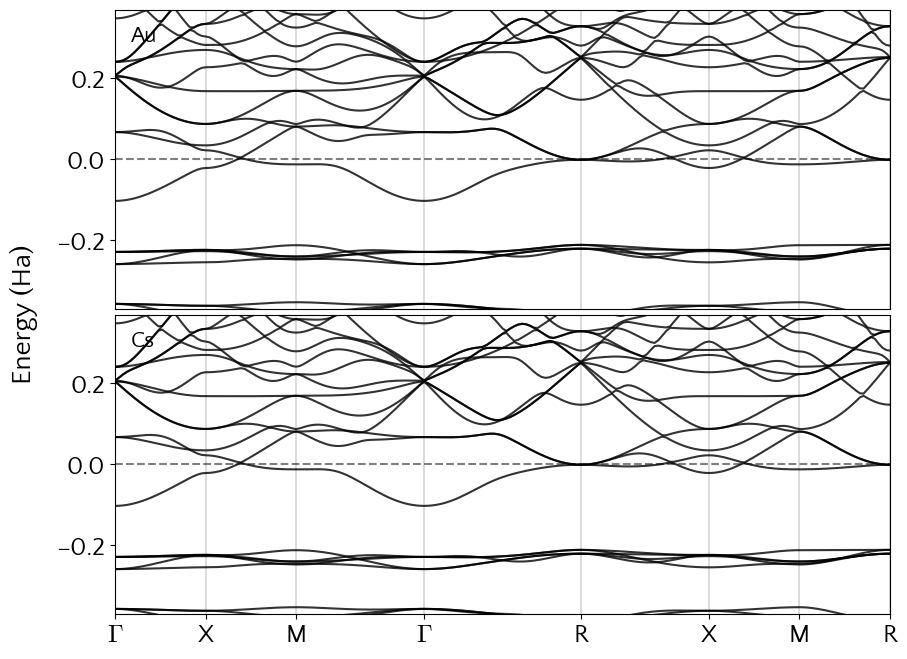

In [26]:
plot_bandstructure_atoms(dictionary_species, vertice_coords, vertice_labels, l_resolved = False)

In [22]:
file = 'bandstructure.wannier.xml'

file.rstrip('.'+file.split('.')[-1])+'.pdf'

'bandstructure.wannier.pdf'